In [4]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap
from sklearn.datasets import dump_svmlight_file
import numpy as np
import matplotlib.pylab as pl


tr_fn='tr_bm_gl_nm.txt'
val_fn='val_bm_gl_nm.txt'
te_fn='cli_test_bm_gl_nm.txt'
sus_fn='sus_bm_gl_nm.txt'

tr_fn_bm3='new_tr_bm_gl_nm_bm3.txt'
val_fn_bm3='new_val_bm_gl_nm_bm3.txt'
te_fn_bm3='new_cli_test_bm_gl_nm_bm3.txt'
sus_fn_bm3='new_sus_bm_gl_nm_bm3.txt'

svm_tr_b3='svmlight_new_train_bm_gl_nm_3.dat'
svm_val_b3='svmlight_new_val_bm_gl_nm_3.dat'
svm_te_b3='svmlight_new_cli_test_bm_gl_nm_3.dat'
svm_sus_b3='svmlight_new_sus_bm_gl_nm_3.dat'

# BM_3

In [5]:
dtrain = xgb.DMatrix(svm_tr_b3)
dtest = xgb.DMatrix(svm_te_b3)
dval=xgb.DMatrix(svm_val_b3)
params = {
    "eta": 0.001,
    "objective": "binary:logistic",
    "subsample": 0.7,
    "eval_metric": ["logloss"]
}
model = xgb.train(params, dtrain, 2000, evals = [(dval, "test")], verbose_eval=500, early_stopping_rounds=20)

[11:52:53] 2199x16 matrix with 30071 entries loaded from /home/parmita/img_learning_tf/tf_keras/glaucoma/n_data/svmlight_new_train_bm_gl_nm_3_v2.dat
[11:52:53] 100x16 matrix with 1385 entries loaded from /home/parmita/img_learning_tf/tf_keras/glaucoma/n_data/svmlight_new_cli_test_bm_gl_nm_3_v2.dat
[11:52:53] 177x16 matrix with 2416 entries loaded from /home/parmita/img_learning_tf/tf_keras/glaucoma/n_data/svmlight_new_val_bm_gl_nm_3_v2.dat
[0]	test-logloss:0.693008
Will train until test-logloss hasn't improved in 20 rounds.
[500]	test-logloss:0.656709
Stopping. Best iteration:
[814]	test-logloss:0.651054



In [6]:
preds = model.predict(dtest)
te_data=pd.read_table(te_fn_bm3) 
te_data['pred']=preds
label=te_data['l']
ypred=preds

In [ ]:
tr_data=pd.read_table(tr_fn_bm3)
te_data=pd.read_table(te_fn_bm3) 
val_data=pd.read_table(val_fn_bm3)
comb=pd.concat((tr_data,te_data),axis=0)
comb=pd.concat((comb,val_data),axis=0)

comb=comb[['l','Gender', 'Age','Ethnic_bkgd','BMI','diab_diag','PEF','FVC','Diastolic',
          'Systolic','PR','caff_last_hour','smoke_last_hour','current_eye_infection',"IOP","corneal_hyst","corneal_resist"]]
y=comb.pop('l')

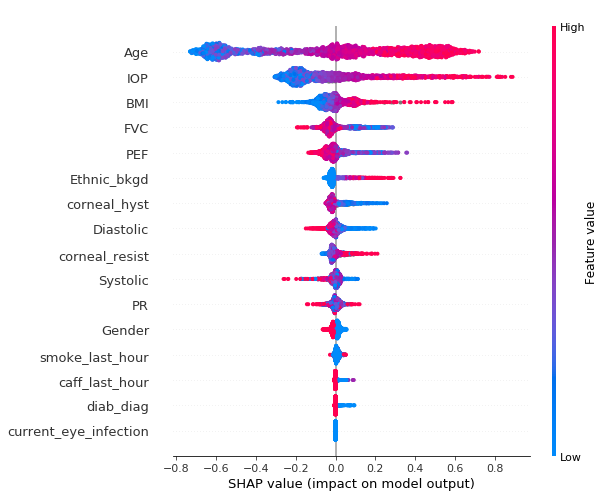

In [14]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(comb)
shap.summary_plot(shap_values, comb)

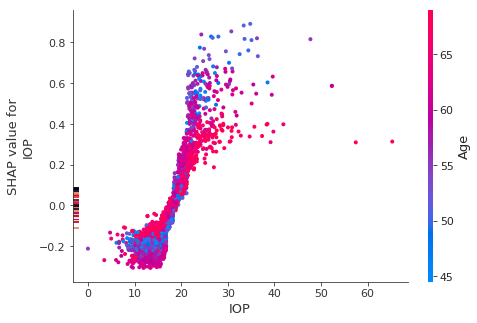

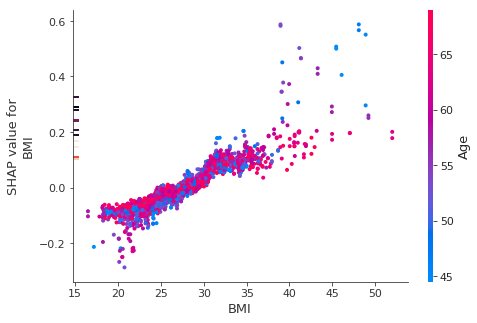

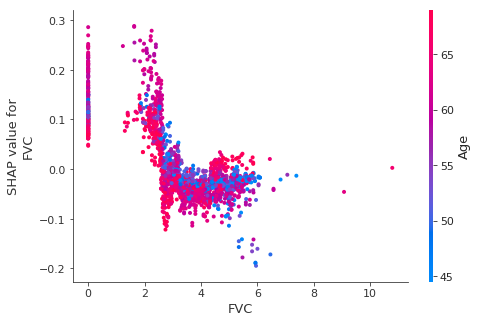

In [6]:
dependence_plot("IOP", shap_values, comb)
dependence_plot("BMI", shap_values, comb)
dependence_plot("FVC", shap_values, comb)

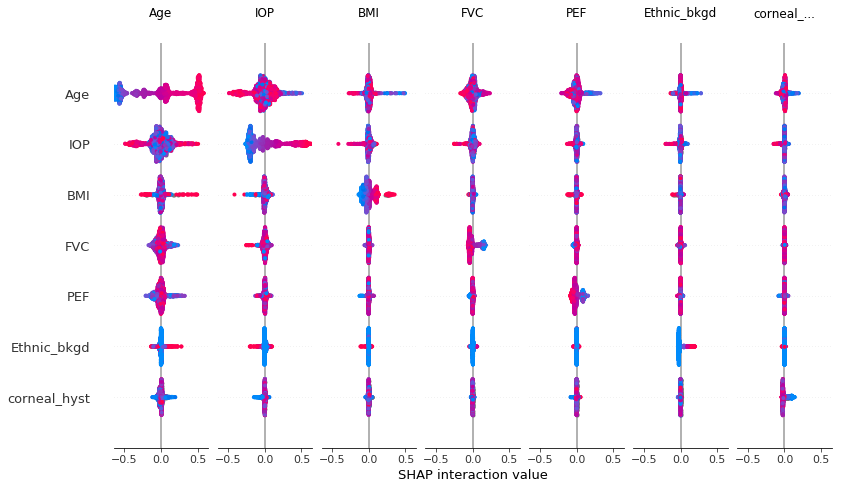

In [8]:
explainer = shap.TreeExplainer(model)
x=comb.copy()
x.columns=['f0','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15']
shap_interaction_values = explainer.shap_interaction_values(x)
shap.summary_plot(shap_interaction_values,comb)

In [9]:
sv_i=pd.DataFrame(y)
sv_i.shape
sv_i.columns=['label']

sv_i['age_bmi']=shap_interaction_values[:,1,3]*2
sv_i['Age']=comb['Age']
sv_i['BMI']=comb['BMI']
sv_i['IOP']=comb['IOP']
sv_i['FVC']=comb['FVC']
sv_i['gender']=comb['Gender']
sv_i['iop_age']=shap_interaction_values[:,1,13]*2
sv_i['age_fvc']=shap_interaction_values[:,1,6] *2
sv_i['age_gen']=shap_interaction_values[:,1,0]*2
sv_i['iop_fvc']=shap_interaction_values[:,13,6]*2
sv_i['bmi_fvc']=shap_interaction_values[:,3,6]*2
sv_i['bmi_IOP']=shap_interaction_values[:,3,13]*2
sv_i['bmi_gen']=shap_interaction_values[:,3,0]*2
sv_i['fvc_gen']=shap_interaction_values[:,6,0]*2
sv_i['iop_gen']=shap_interaction_values[:,13,0]*2

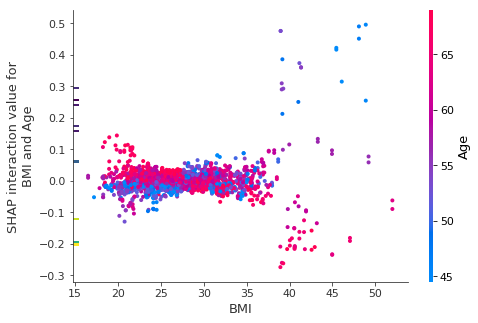

In [10]:
dependence_plot(
    ("BMI", "Age"),
    shap_interaction_values, comb)

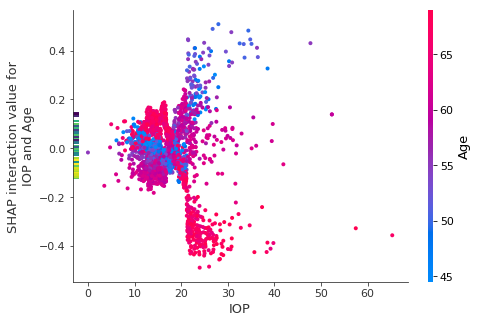

In [11]:
dependence_plot(
    ("IOP", "Age"),
    shap_interaction_values, comb)

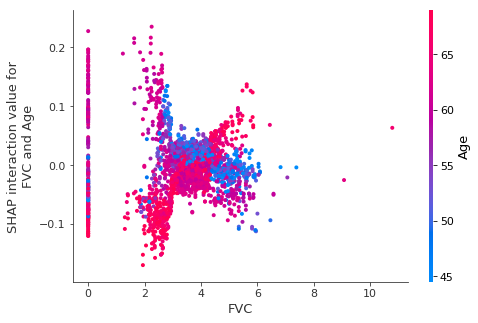

In [12]:
dependence_plot(
    ("FVC", "Age"),
    shap_interaction_values, comb)

In [ ]:
age_df=comb[['Age','BMI','FVC','IOP']]
age_df['l']=y
age_df['Age_sv']=shap_values[:,1]
age_df['BMI_sv']=shap_values[:,3]
age_df['FVC_sv']=shap_values[:,6]
age_df['IOP_sv']=shap_values[:,13]
colors=['forestgreen','darkorange']